## 1. Imports

In [80]:
#import libraries
import numpy as np
import pandas as pd
import random
import sklearn as sk
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [81]:
#inport dataset
df_train = pd.read_csv("./surfing_train.csv")
df_test = pd.read_csv("./surfing_test.csv")

In [82]:
df_train.head()

,Id,Location,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,SafeToSurfTomorrow,Year,Day,Month
0,0,beachspot18,-2.2,4.8,0.2,NaN,NaN,SW,65.0,SW,...,NaN,NaN,NaN,1.5,2.3,No,No,2012,22,May
1,1,beachspot28,8.9,27.5,0.0,3.4,9.7,ESE,35.0,NaN,...,1012.1,NaN,NaN,15.8,26.4,No,Yes,2010,5,April
2,2,beachspot36,6.3,21.2,0.0,5.8,11.1,NNE,37.0,NE,...,1021.1,3.0,4.0,15.3,20.3,No,No,2010,30,September
3,3,beachspot3,19.7,26.8,7.2,2.4,2.9,SSW,39.0,ENE,...,1007.1,8.0,7.0,22.0,24.4,Yes,No,2010,5,February
4,4,beachspot26,7.5,13.0,0.8,0.4,1.6,SSW,28.0,SSW,...,1028.4,7.0,8.0,10.6,12.0,No,Yes,2010,22,September


In [83]:
print("df_test shape :",df_test.shape,"df_train shape :",df_train.shape)

df_test shape : (42658, 25) df_train shape : (99535, 26)


In [84]:
"""adding dummy column to df_test as 'SafeToSurfTomorrow' to mix train and test data to preprocess &
indicator column to segregate train and test data later"""
df_test['SafeToSurfTomorrow']='zz'
df_test['indicator']=0
df_train['indicator']=1
df = pd.concat([df_test, df_train])

In [85]:
df.describe()

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Day,indicator
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,72714.909116,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,15.715084,0.699999
std,41993.999136,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,8.798150,0.458259
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,0.000000
25%,36343.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,8.000000,0.000000
50%,72695.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,16.000000,1.000000
75%,109100.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,23.000000,1.000000
max,145459.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,31.000000,1.000000


## 2. Preprocessing

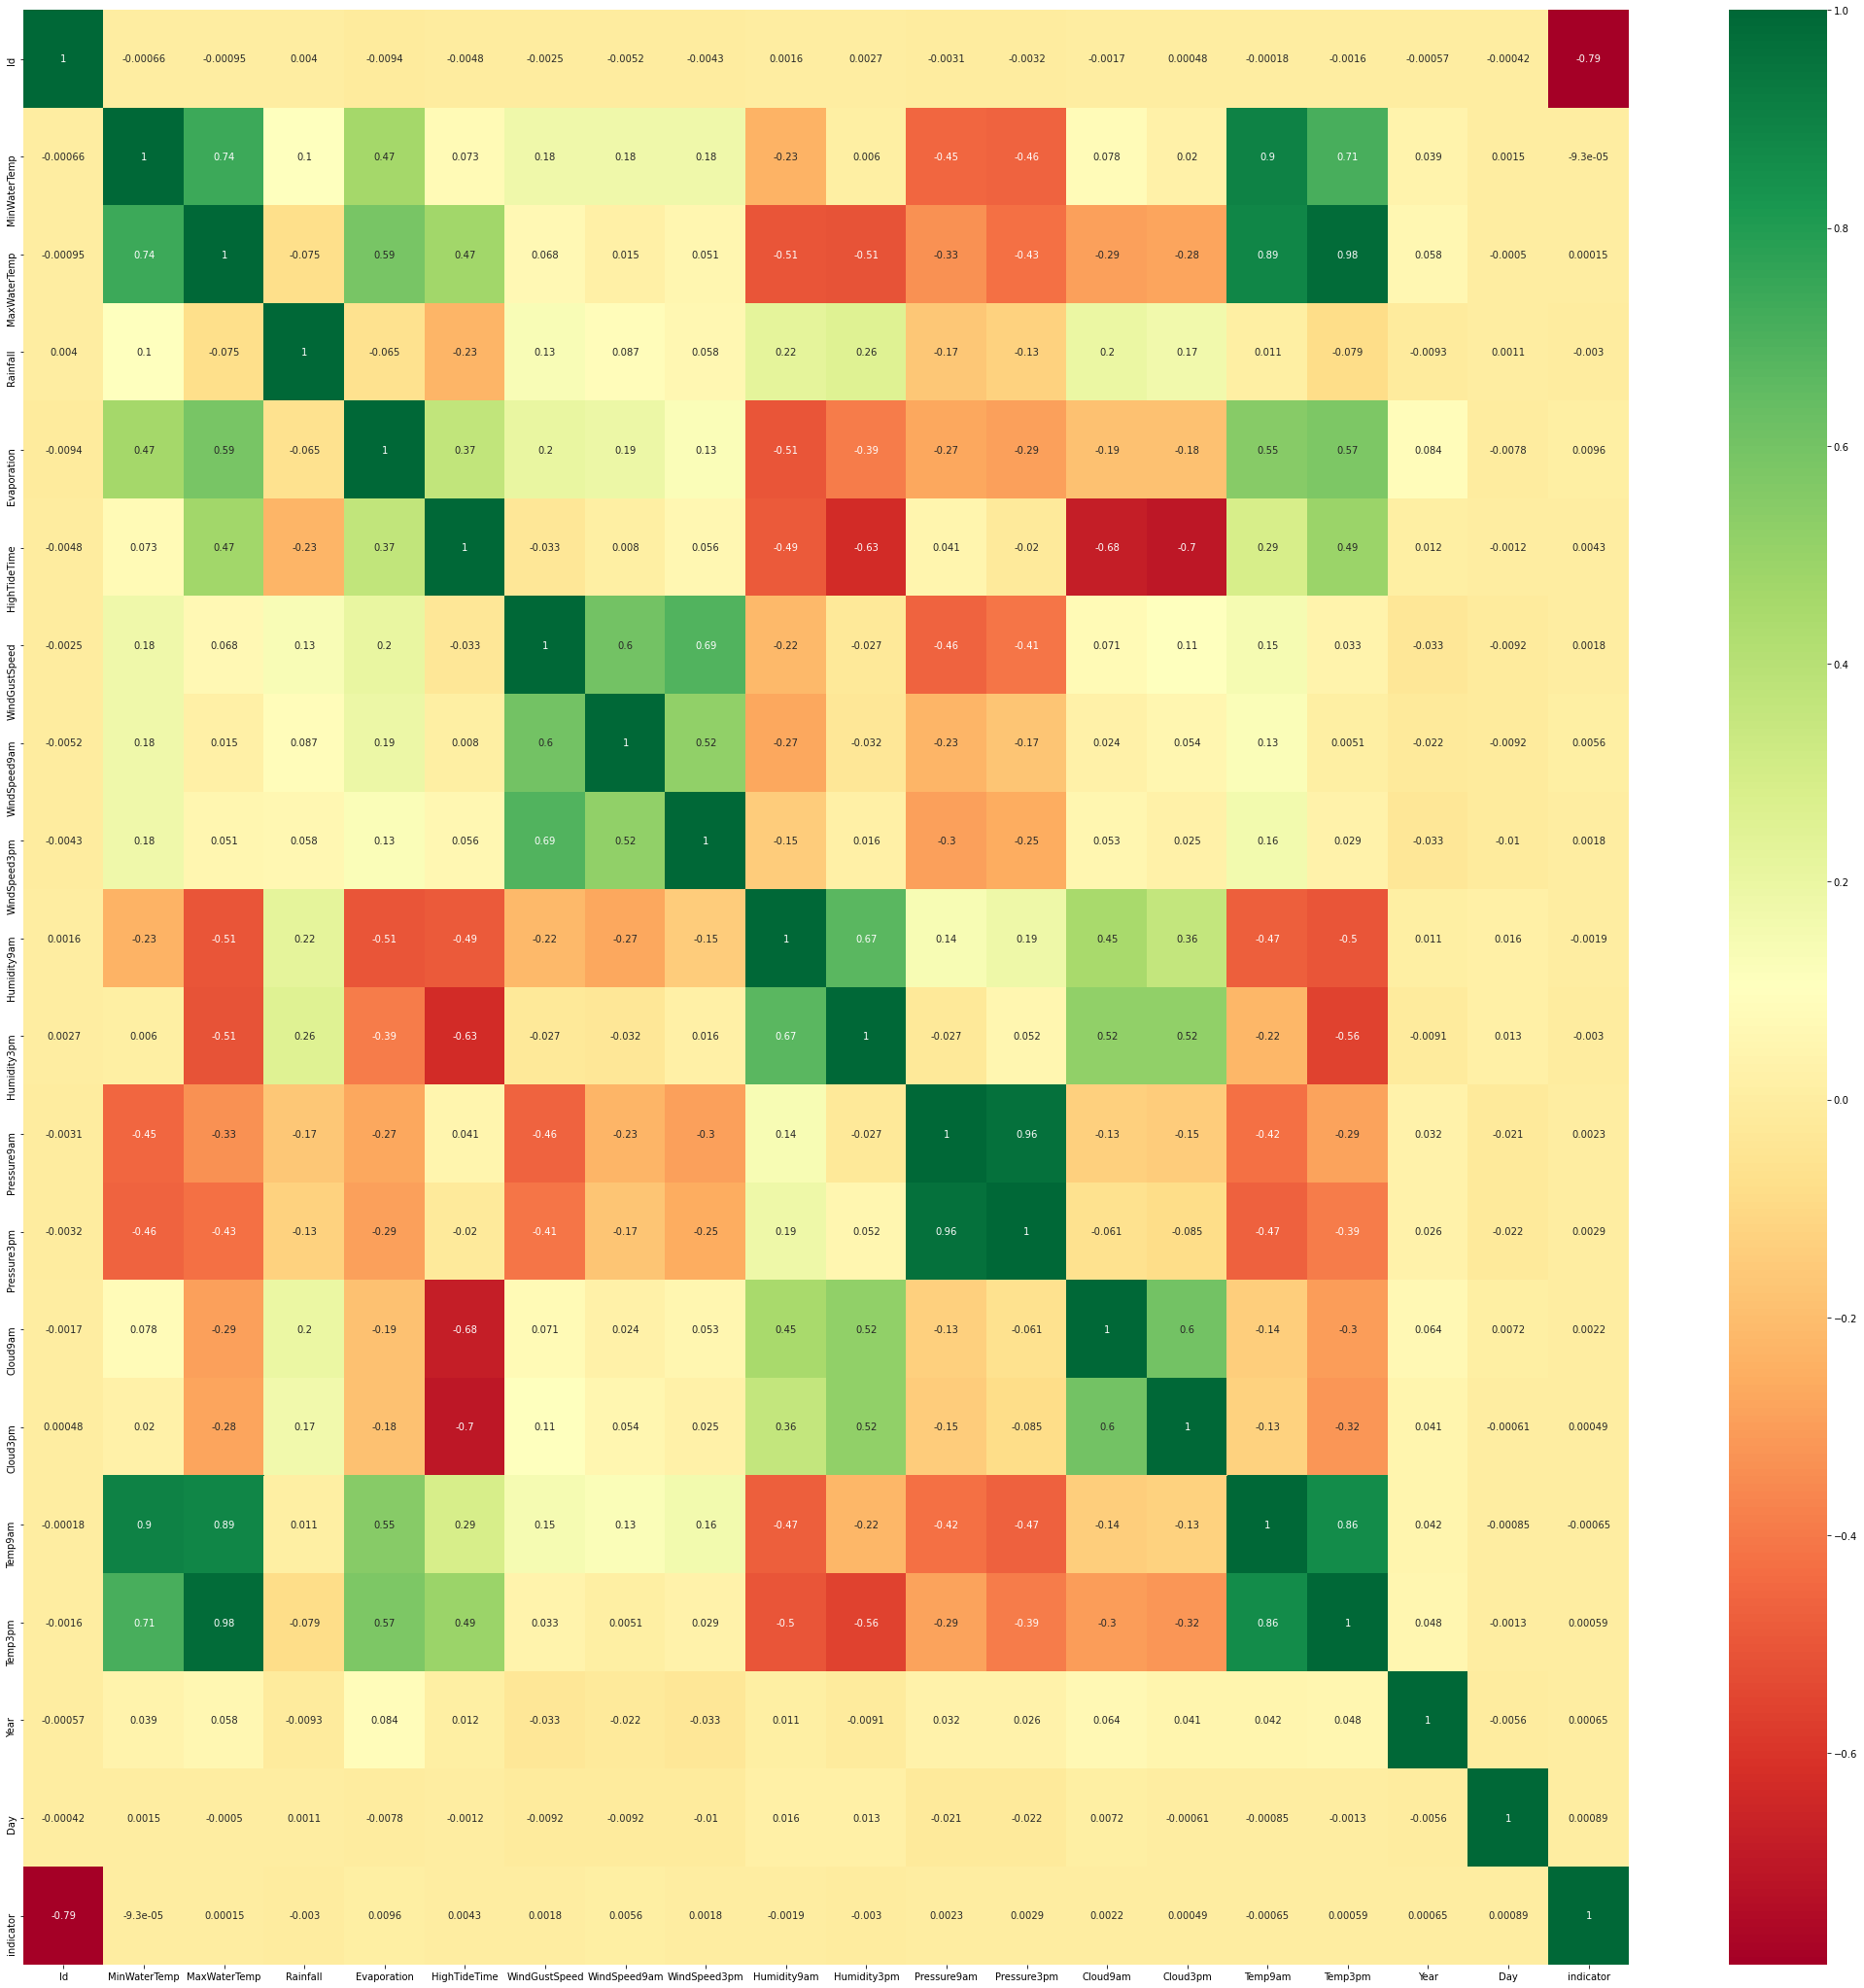

In [86]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(37,37))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [87]:
"""from correlation matrix we can see that their is no relation of day,
year and similarlly of month with target value hence excluding them"""

df.drop('Day', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)

In [88]:
df.isna().sum()

Id                        0
Location                  0
MinWaterTemp            637
MaxWaterTemp            322
Rainfall               1406
Evaporation           60843
HighTideTime          67816
WindGustDir            9330
WindGustSpeed          9270
WindDir9am            10013
WindDir3pm             3778
WindSpeed9am           1348
WindSpeed3pm           2630
Humidity9am            1774
Humidity3pm            3610
Pressure9am           14014
Pressure3pm           13981
Cloud9am              53657
Cloud3pm              57094
Temp9am                 904
Temp3pm                2726
SafeToSurfToday        1406
SafeToSurfTomorrow        0
indicator                 0
dtype: int64

In [89]:
dfmedian=df.median()
dfmode=df.mode()
dfmean=df.mean()

In [90]:
dfmean

Id               72714.909116
MinWaterTemp        12.186400
MaxWaterTemp        23.226784
Rainfall             2.349974
Evaporation          5.469824
HighTideTime         7.624853
WindGustSpeed       39.984292
WindSpeed9am        14.001988
WindSpeed3pm        18.637576
Humidity9am         68.843810
Humidity3pm         51.482606
Pressure9am       1017.653758
Pressure3pm       1015.258204
Cloud9am             4.437189
Cloud3pm             4.503167
Temp9am             16.987509
Temp3pm             21.687235
indicator            0.699999
dtype: float64

In [91]:
dfmedian

Id               72695.0
MinWaterTemp        12.0
MaxWaterTemp        22.6
Rainfall             0.0
Evaporation          4.8
HighTideTime         8.5
WindGustSpeed       39.0
WindSpeed9am        13.0
WindSpeed3pm        19.0
Humidity9am         70.0
Humidity3pm         52.0
Pressure9am       1017.6
Pressure3pm       1015.2
Cloud9am             5.0
Cloud3pm             5.0
Temp9am             16.7
Temp3pm             21.1
indicator            1.0
dtype: float64

In [92]:
""" Filling null values of continious features with mean as you can see from above mean and median their is no as much diff in mean and median"""

df["MinWaterTemp"].fillna(df["MinWaterTemp"].mean(), inplace=True)
df["MaxWaterTemp"].fillna(df["MaxWaterTemp"].mean(), inplace=True)
df["Rainfall"].fillna(df["Rainfall"].mean(), inplace=True)
df["Evaporation"].fillna(df["Evaporation"].mean(), inplace=True)
df["HighTideTime"].fillna(df["HighTideTime"].mean(), inplace=True)
df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean(), inplace=True)
df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean(), inplace=True)
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean(), inplace=True)
df["Humidity9am"].fillna(df["Humidity9am"].mean(), inplace=True)
df["Humidity3pm"].fillna(df["Humidity3pm"].mean(), inplace=True)
df["Pressure9am"].fillna(df["Pressure9am"].mean(), inplace=True)
df["Pressure3pm"].fillna(df["Pressure3pm"].mean(), inplace=True)
df["Cloud9am"].fillna(df["Cloud9am"].mean(), inplace=True)
df["Cloud3pm"].fillna(df["Cloud3pm"].mean(), inplace=True)
df["Temp9am"].fillna(df["Temp9am"].mean(), inplace=True)
df["Temp3pm"].fillna(df["Temp3pm"].mean(), inplace=True)

In [93]:
df.isnull().sum()

Id                        0
Location                  0
MinWaterTemp              0
MaxWaterTemp              0
Rainfall                  0
Evaporation               0
HighTideTime              0
WindGustDir            9330
WindGustSpeed             0
WindDir9am            10013
WindDir3pm             3778
WindSpeed9am              0
WindSpeed3pm              0
Humidity9am               0
Humidity3pm               0
Pressure9am               0
Pressure3pm               0
Cloud9am                  0
Cloud3pm                  0
Temp9am                   0
Temp3pm                   0
SafeToSurfToday        1406
SafeToSurfTomorrow        0
indicator                 0
dtype: int64

In [94]:
df['SafeToSurfToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [95]:
df['SafeToSurfToday'].mode()

0    No
dtype: object

In [96]:
#replacing categorical data with mode
df['SafeToSurfToday'] = df['SafeToSurfToday'].fillna('No')

In [97]:
df['SafeToSurfToday'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'SafeToSurfToday'
df['SafeToSurfToday']= label_encoder.fit_transform(df['SafeToSurfToday'])
df['SafeToSurfToday'].unique()

array([0, 1])

In [99]:
# Encode labels in column ''SafeToSurfTomorrow''.
df['SafeToSurfTomorrow']= label_encoder.fit_transform(df['SafeToSurfTomorrow'])
df['SafeToSurfTomorrow'].unique()
#list(label_encoder.inverse_transform([2, 2, 1]))

array([2, 0, 1])

In [100]:
df

,Id,Location,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,SafeToSurfTomorrow,indicator
0,101804,beachspot23,9.7,19.2,0.8,7.600000,4.100000,WNW,69.000000,N,...,28.0,995.400000,992.000000,7.000000,7.000000,10.7,19.2,0,2,0
1,101805,beachspot37,10.2,21.4,0.8,3.200000,10.700000,NaN,39.984292,ESE,...,62.0,1023.300000,1019.700000,6.000000,1.000000,16.1,17.4,0,2,0
2,101806,beachspot46,21.5,39.9,0.0,13.200000,11.500000,E,33.000000,NE,...,13.0,1007.700000,1004.900000,2.000000,3.000000,33.2,38.2,0,2,0
3,101807,beachspot31,23.3,28.8,23.2,5.469824,7.624853,ESE,43.000000,SE,...,70.0,1021.300000,1018.600000,4.437189,4.503167,25.3,25.8,1,2,0
4,101808,beachspot16,8.7,25.6,0.0,5.469824,7.624853,NW,50.000000,NaN,...,38.0,1022.300000,1017.700000,6.000000,6.000000,14.3,24.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99530,101799,beachspot42,8.6,18.7,5.6,5.469824,7.624853,W,56.000000,W,...,44.0,1017.653758,1015.258204,4.437189,4.503167,13.0,18.3,1,0,1
99531,101800,beachspot4,7.9,25.0,0.0,2.800000,10.200000,SSW,35.000000,WSW,...,47.0,1020.700000,1019.100000,1.000000,1.000000,19.5,22.0,0,0,1
99532,101801,beachspot35,3.9,20.4,0.0,4.000000,11.500000,SW,44.000000,NNE,...,41.0,1016.700000,1015.600000,3.000000,4.000000,10.9,19.3,0,0,1
99533,101802,beachspot10,24.3,44.4,0.0,11.800000,7.624853,WNW,59.000000,WNW,...,40.0,1005.300000,1004.200000,4.437189,4.503167,37.6,32.9,0,0,1


In [101]:
#one-hot encoding for categorical data 
column_names_to_one_hot = ["Location","WindGustDir", "WindDir9am","WindDir3pm"]
df = pd.get_dummies(df, columns=column_names_to_one_hot)
df.head()

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,101804,9.7,19.2,0.8,7.600000,4.100000,69.000000,43.0,37.0,62.0,...,0,1,0,0,0,0,0,0,0,0
1,101805,10.2,21.4,0.8,3.200000,10.700000,39.984292,11.0,28.0,57.0,...,0,0,0,0,0,0,0,0,0,0
2,101806,21.5,39.9,0.0,13.200000,11.500000,33.000000,13.0,19.0,16.0,...,0,0,0,0,0,0,0,0,0,0
3,101807,23.3,28.8,23.2,5.469824,7.624853,43.000000,33.0,26.0,71.0,...,0,0,0,1,0,0,0,0,0,0
4,101808,8.7,25.6,0.0,5.469824,7.624853,50.000000,0.0,28.0,69.0,...,1,0,0,0,0,0,0,0,0,0


In [102]:
df

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,101804,9.7,19.2,0.8,7.600000,4.100000,69.000000,43.0,37.0,62.0,...,0,1,0,0,0,0,0,0,0,0
1,101805,10.2,21.4,0.8,3.200000,10.700000,39.984292,11.0,28.0,57.0,...,0,0,0,0,0,0,0,0,0,0
2,101806,21.5,39.9,0.0,13.200000,11.500000,33.000000,13.0,19.0,16.0,...,0,0,0,0,0,0,0,0,0,0
3,101807,23.3,28.8,23.2,5.469824,7.624853,43.000000,33.0,26.0,71.0,...,0,0,0,1,0,0,0,0,0,0
4,101808,8.7,25.6,0.0,5.469824,7.624853,50.000000,0.0,28.0,69.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99530,101799,8.6,18.7,5.6,5.469824,7.624853,56.000000,26.0,19.0,58.0,...,0,0,0,0,0,0,0,1,0,0
99531,101800,7.9,25.0,0.0,2.800000,10.200000,35.000000,2.0,20.0,52.0,...,0,0,1,0,0,0,0,0,0,0
99532,101801,3.9,20.4,0.0,4.000000,11.500000,44.000000,11.0,26.0,86.0,...,0,0,0,0,0,0,0,0,0,1
99533,101802,24.3,44.4,0.0,11.800000,7.624853,59.000000,35.0,43.0,28.0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df.isnull().sum()

Id                0
MinWaterTemp      0
MaxWaterTemp      0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 117, dtype: int64

In [104]:
(df == "?").sum()

Id                0
MinWaterTemp      0
MaxWaterTemp      0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 117, dtype: int64

## 3. Removing outliers in data if any

In [105]:
#here we are using IQR for outlier removal as there are many outliers
#function to plot outliers
def outlierPlot(p):
    sns.boxplot(x=p)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(p)

#function for getting upper and lower limit
def upperLower(dfcolumnName):
    percentile25 = dfcolumnName.quantile(0.25)
    percentile75 = dfcolumnName.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit,lower_limit

#functopn for caaping i.e removing outlieers
def capping(df,upper_limit,lower_limit,column_name):
    new_df_cap = df.copy()
    new_df_cap[column_name] = np.where(
    new_df_cap[column_name] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[column_name] < lower_limit,
        lower_limit,
        new_df_cap[column_name]
        )
    )
    return new_df_cap[column_name]

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


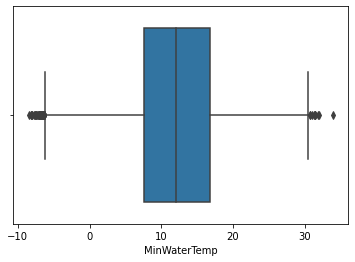

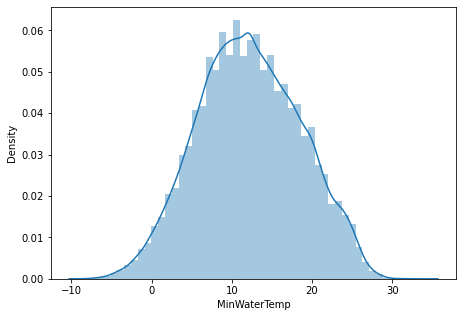

In [106]:
# outlier detection for MinWaterTemp
outlierPlot(df['MinWaterTemp'])

In [107]:
upper_limit,lower_limit = upperLower(df['MinWaterTemp'])
df['MinWaterTemp'] = capping(df,upper_limit,lower_limit,'MinWaterTemp')

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


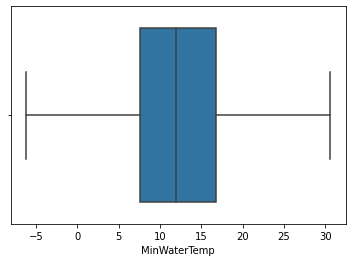

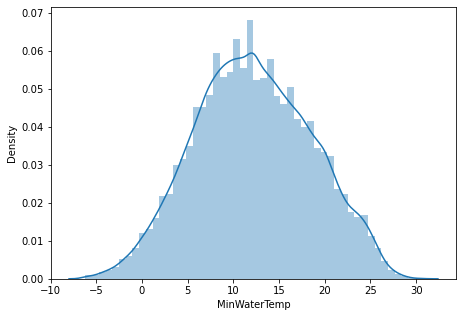

In [108]:
outlierPlot(df['MinWaterTemp'])# as you can see from below graph outliers are removed

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


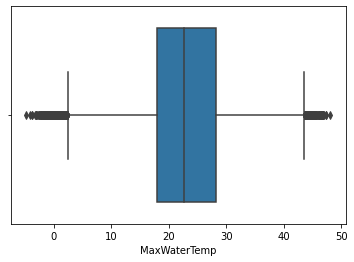

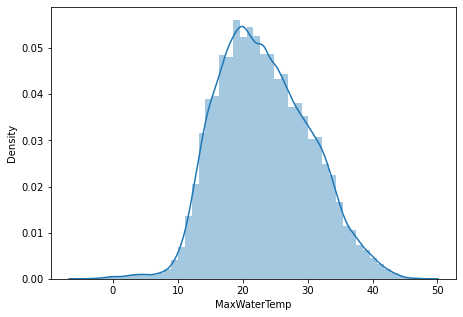

In [109]:
# outlier detection for MaxWaterTemp
outlierPlot(df['MaxWaterTemp'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


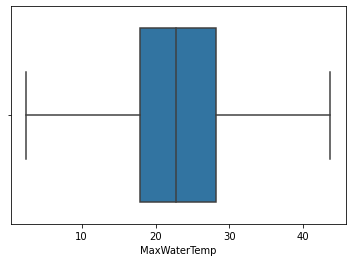

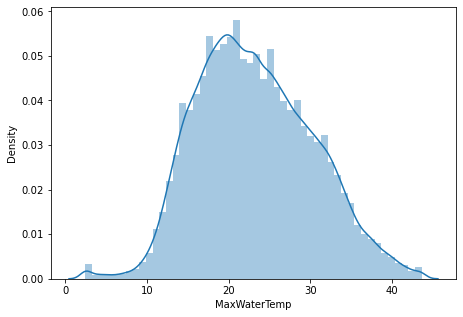

In [110]:
upper_limit,lower_limit = upperLower(df['MaxWaterTemp'])
df['MaxWaterTemp'] = capping(df,upper_limit,lower_limit,'MaxWaterTemp')
outlierPlot(df['MaxWaterTemp'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


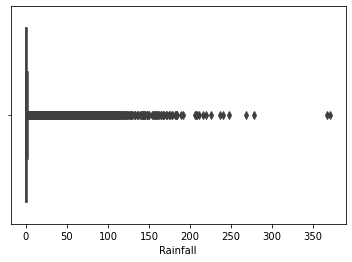

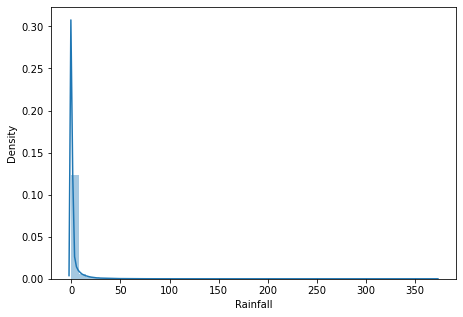

In [111]:
# outlier detection for Rainfall
outlierPlot(df['Rainfall'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


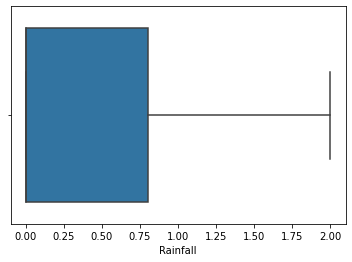

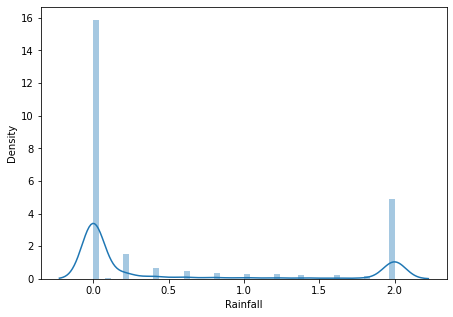

In [112]:
upper_limit,lower_limit = upperLower(df['Rainfall'])
df['Rainfall'] = capping(df,upper_limit,lower_limit,'Rainfall')
outlierPlot(df['Rainfall'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


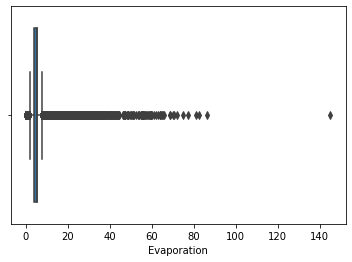

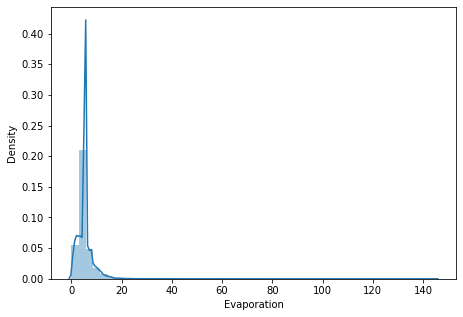

In [113]:
# outlier detection for Evaporation
outlierPlot(df['Evaporation'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


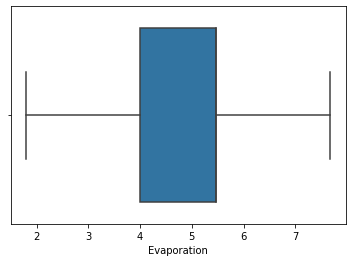

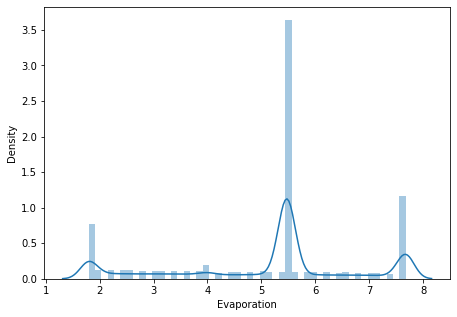

In [114]:
upper_limit,lower_limit = upperLower(df['Evaporation'])
df['Evaporation'] = capping(df,upper_limit,lower_limit,'Evaporation')
outlierPlot(df['Evaporation'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


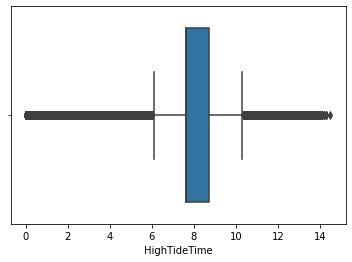

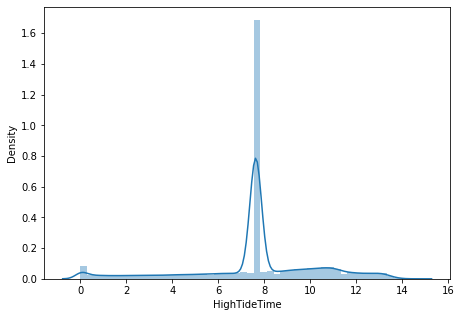

In [115]:
# outlier detection for HighTideTime
outlierPlot(df['HighTideTime'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


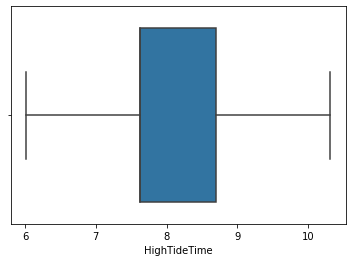

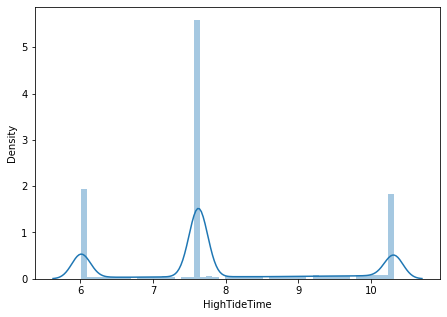

In [116]:
upper_limit,lower_limit = upperLower(df['HighTideTime'])
df['HighTideTime'] = capping(df,upper_limit,lower_limit,'HighTideTime')
outlierPlot(df['HighTideTime'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


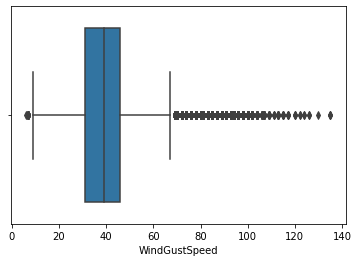

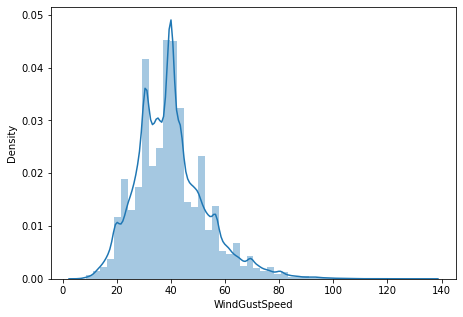

In [117]:
# outlier detection for WindGustSpeed
outlierPlot(df['WindGustSpeed'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


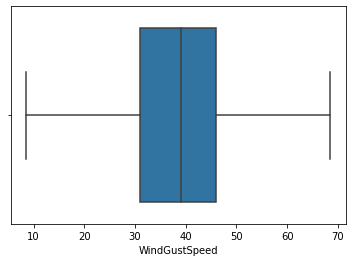

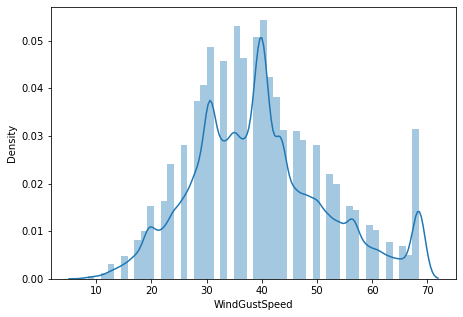

In [118]:
upper_limit,lower_limit = upperLower(df['WindGustSpeed'])
df['WindGustSpeed'] = capping(df,upper_limit,lower_limit,'WindGustSpeed')
outlierPlot(df['WindGustSpeed'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


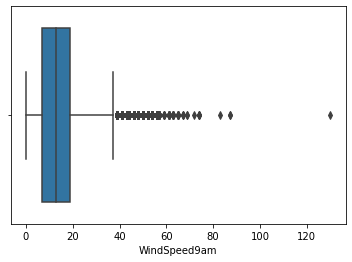

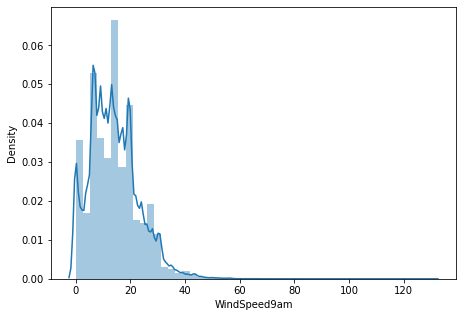

In [119]:
# outlier detection for WindSpeed9am
outlierPlot(df['WindSpeed9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


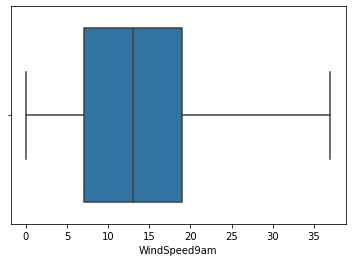

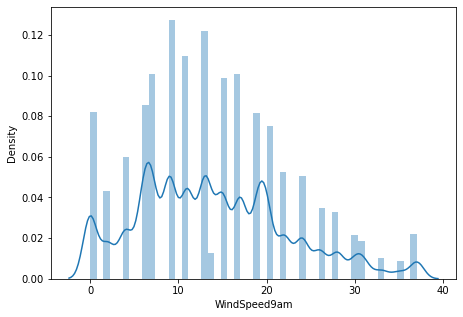

In [120]:
upper_limit,lower_limit = upperLower(df['WindSpeed9am'])
df['WindSpeed9am'] = capping(df,upper_limit,lower_limit,'WindSpeed9am')
outlierPlot(df['WindSpeed9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


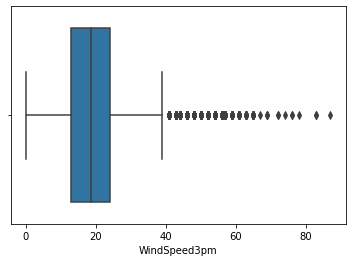

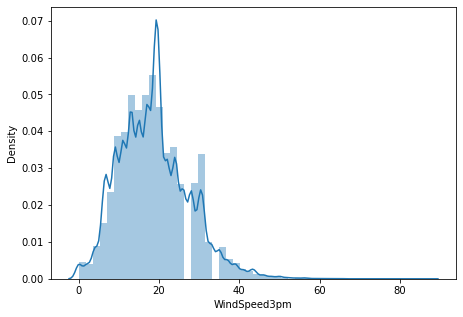

In [121]:
# outlier detection for WindSpeed3pm
outlierPlot(df['WindSpeed3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


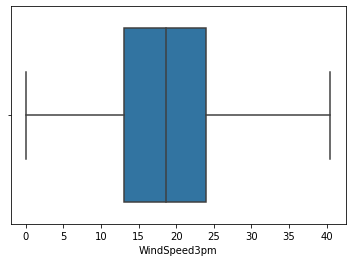

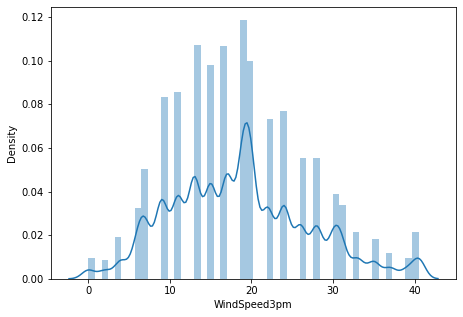

In [122]:
upper_limit,lower_limit = upperLower(df['WindSpeed3pm'])
df['WindSpeed3pm'] = capping(df,upper_limit,lower_limit,'WindSpeed3pm')
outlierPlot(df['WindSpeed3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


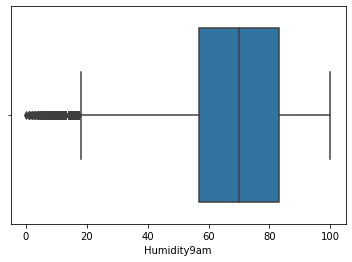

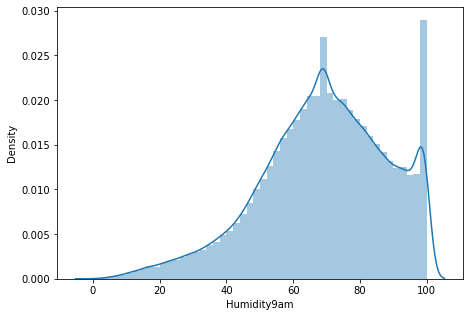

In [123]:
# outlier detection for Humidity9am
outlierPlot(df['Humidity9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


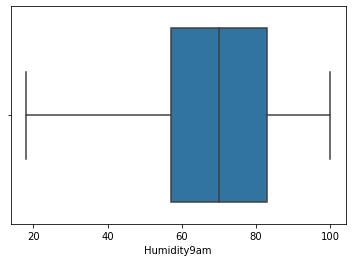

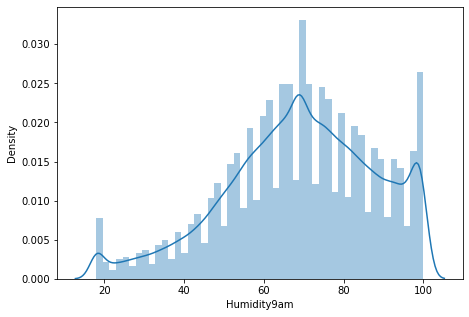

In [124]:
upper_limit,lower_limit = upperLower(df['Humidity9am'])
df['Humidity9am'] = capping(df,upper_limit,lower_limit,'Humidity9am')
outlierPlot(df['Humidity9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


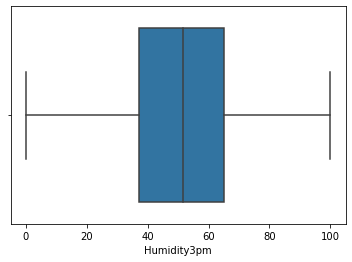

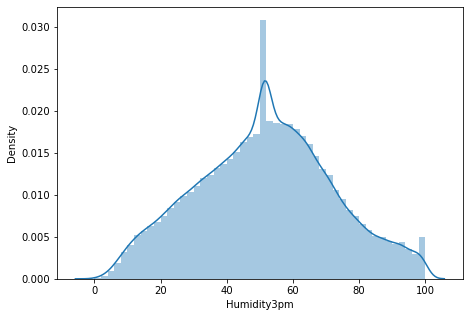

In [125]:
# outlier detection for Humidity3pm
outlierPlot(df['Humidity3pm'])
#no outlier detected

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


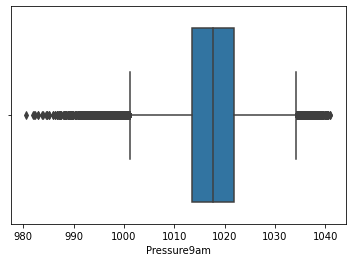

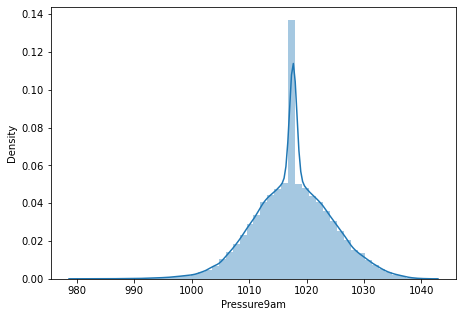

In [126]:
# outlier detection for Pressure9am
outlierPlot(df['Pressure9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


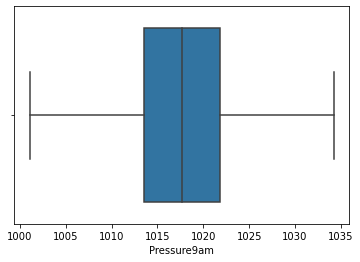

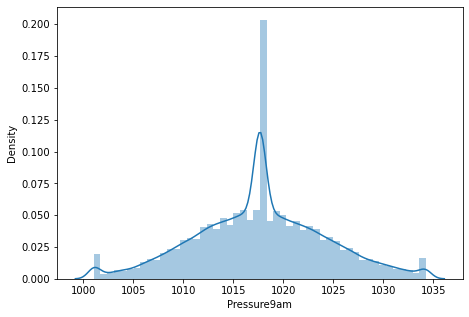

In [127]:
upper_limit,lower_limit = upperLower(df['Pressure9am'])
df['Pressure9am'] = capping(df,upper_limit,lower_limit,'Pressure9am')
outlierPlot(df['Pressure9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


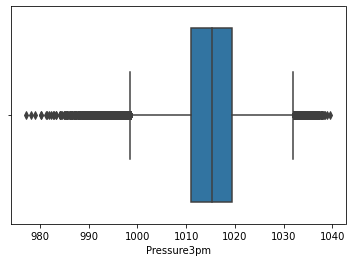

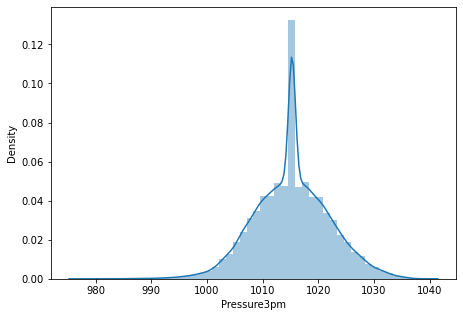

In [128]:
# outlier detection for Pressure3pm
outlierPlot(df['Pressure3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


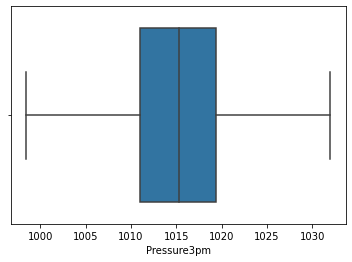

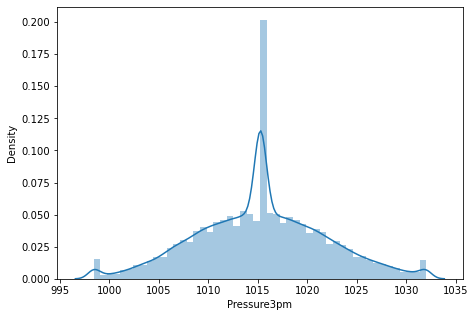

In [129]:
upper_limit,lower_limit = upperLower(df['Pressure3pm'])
df['Pressure3pm'] = capping(df,upper_limit,lower_limit,'Pressure3pm')
outlierPlot(df['Pressure3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


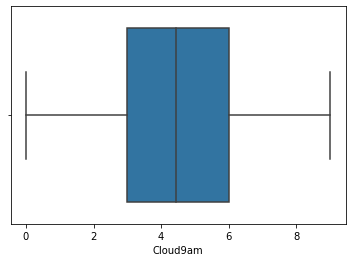

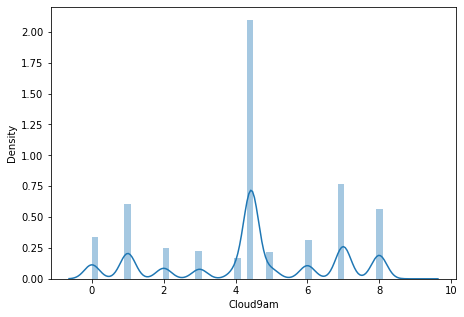

In [130]:
# outlier detection for Cloud9am
outlierPlot(df['Cloud9am'])
#no outlier detected

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


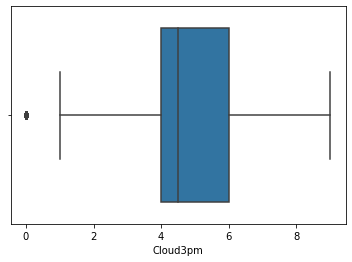

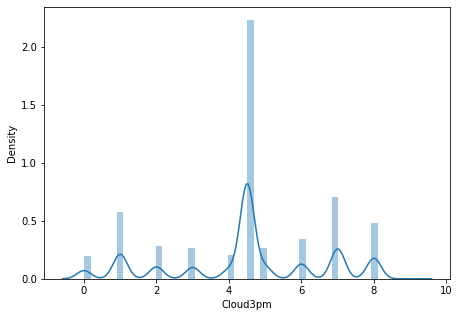

In [131]:
# outlier detection for Cloud3pm
outlierPlot(df['Cloud3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


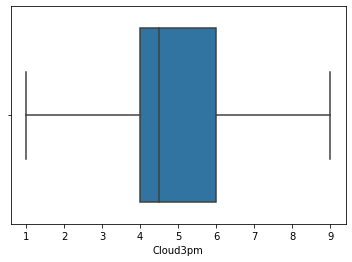

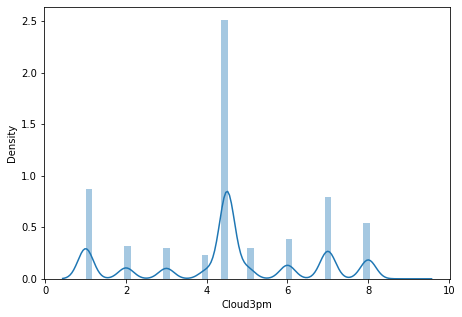

In [132]:
upper_limit,lower_limit = upperLower(df['Cloud3pm'])
df['Cloud3pm'] = capping(df,upper_limit,lower_limit,'Cloud3pm')
outlierPlot(df['Cloud3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


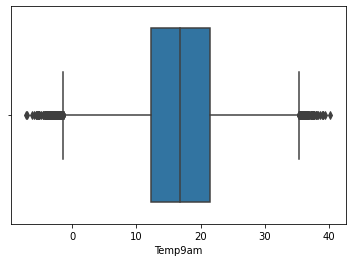

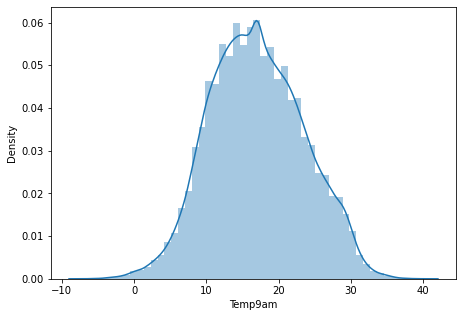

In [133]:
# outlier detection for Temp9am
outlierPlot(df['Temp9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


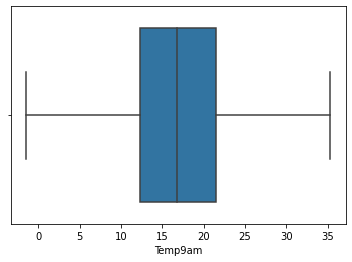

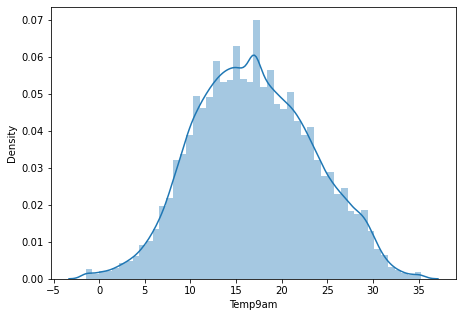

In [134]:
upper_limit,lower_limit = upperLower(df['Temp9am'])
df['Temp9am'] = capping(df,upper_limit,lower_limit,'Temp9am')
outlierPlot(df['Temp9am'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


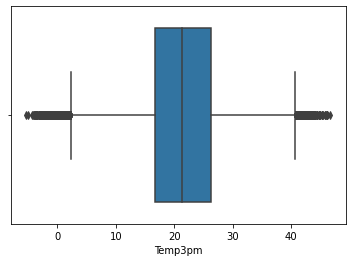

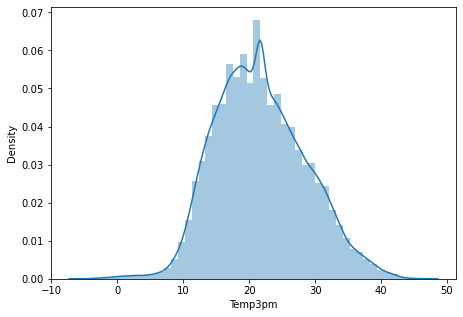

In [135]:
# outlier detection for Temp3pm
outlierPlot(df['Temp3pm'])

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


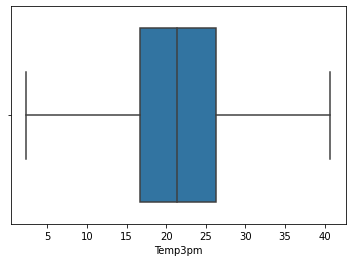

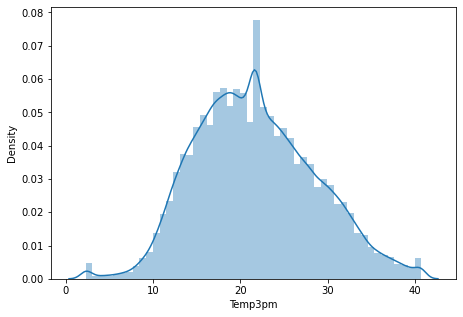

In [136]:
upper_limit,lower_limit = upperLower(df['Temp3pm'])
df['Temp3pm'] = capping(df,upper_limit,lower_limit,'Temp3pm')
outlierPlot(df['Temp3pm'])

## 4. feature scaling

In [137]:
# splitting feature variables and target variables for scaling
df_newY = pd.DataFrame(df['SafeToSurfTomorrow'])
df_newX = df.drop('SafeToSurfTomorrow', axis=1)

In [138]:
#robust scaling is used to handle outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_newX = pd.DataFrame(scaler.fit_transform(df_newX), columns=df_newX.columns)

## 5. splitting data train test set

In [139]:
X_train_df = df_newX[df_newX["indicator"] == 0]
X_test_df = df_newX[df_newX["indicator"] == -1]

In [140]:
X_train_df

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
42658,-0.999148,-1.543478,-1.737864,0.25,0.000000,0.000000,1.733333,1.250000,1.032948,0.692308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42659,-0.999134,-0.336957,0.466019,0.00,-1.408212,1.930105,-0.266667,-1.083333,-0.876143,0.307692,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42660,-0.999120,-0.619565,-0.145631,0.00,0.224636,2.500000,-0.133333,0.916667,-0.876143,-1.807692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42661,-0.999107,0.836957,0.398058,2.50,-2.088566,-1.500000,0.000000,-0.333333,0.123857,0.884615,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42662,-0.999093,-0.489130,-0.941748,1.00,-2.500000,-1.500000,-0.733333,0.000000,-0.330689,0.769231,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.400016,-0.369565,-0.388350,2.50,0.000000,0.000000,1.133333,1.083333,0.032948,-0.461538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
142189,0.400030,-0.445652,0.223301,0.00,-1.816424,2.395158,-0.266667,-0.916667,0.123857,-0.692308,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142190,0.400044,-0.880435,-0.223301,0.00,-1.000000,2.500000,0.333333,-0.166667,0.669311,0.615385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142191,0.400058,1.336957,2.033981,0.00,1.500000,0.000000,1.333333,1.833333,1.987493,-1.615385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
""" Dropping column we added explicity to merge train and test data at start for preprocessing"""
X_train_df.drop(axis="columns", labels="indicator", inplace=True) 
X_test_df.drop(axis="columns", labels="indicator", inplace=True) 
X_train_df.drop(axis="columns", labels="Id", inplace=True) 
X_test_df.drop(axis="columns", labels="Id", inplace=True) 

C:\Users\Vishwa\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [142]:
# segregating train_target from train and dummy test merge
Y_train_df = df_newY[df_newY["SafeToSurfTomorrow"] != 2]

## 4. Model

### 4.1 using logistic regression

In [143]:
"""using logistic regression"""
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1200)

# fit the model with data
logreg.fit(X_train_df,Y_train_df)

#[:,1] this is applied to take positive probablities
y_pred_logreg=logreg.predict_proba(X_test_df)[:,1]

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [144]:
y_pred_logreg

array([0.58061936, 0.05914955, 0.00820123, ..., 0.13697506, 0.1324167 ,
       0.21277578])

In [145]:
df_test["SafeToSurfTomorrow"] =y_pred_logreg
submission_log = df_test[["Id","SafeToSurfTomorrow"]]
submission_log.to_csv("Olog1.csv",index=False)

### 4.2 using SVM

In [150]:
from sklearn import svm
#Create a svm Classifier
clf = svm.LinearSVC(C=1.0,dual=False) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_df,Y_train_df)

#Predict the response for test dataset
y_pred = clf.predict_proba(X_test_df)

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC(dual=False)

In [154]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm

In [157]:
model_svc = svm.LinearSVC()
model = CalibratedClassifierCV(model_svc)

In [160]:
model.fit(X_train_df,Y_train_df)
pred_class = model.predict(X_test_df)
probability_svm = model.predict_proba(X_test_df)[:,1]

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [161]:
probability_svm

array([0.56568595, 0.06315503, 0.01114093, ..., 0.12985657, 0.12268708,
       0.20933473])

In [162]:
df_test["SafeToSurfTomorrow"] = probability_svm
submission_log = df_test[["Id","SafeToSurfTomorrow"]]
submission_log.to_csv("Osvm1.csv",index=False)

### 4.3 using Naive Bayes

In [166]:
# using NB it gives less accuracy score than Logistic regression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(
    X_train_df.values,
    Y_train_df
)

y_pred_nb = gnb.predict(X_test_df)

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### 4.4 using PCA + Logistic regression

Eigenvalues:
[3.72904412e+00 2.32268879e+00 1.27045779e+00 9.95165397e-01
 8.28729418e-01 6.55738259e-01 5.55413201e-01 4.66363103e-01
 3.05973247e-01 2.80830684e-01 1.89312309e-01 1.77269594e-01
 1.22132468e-01 1.08947014e-01 1.06480845e-01 9.28709811e-02
 8.91132886e-02 8.26245825e-02 7.80672555e-02 7.46399496e-02
 7.10420734e-02 6.87818902e-02 6.73021635e-02 6.57135837e-02
 6.53009511e-02 6.30172914e-02 6.26151582e-02 6.17470841e-02
 6.13750125e-02 6.06947736e-02 5.90845262e-02 5.86945960e-02
 5.80384134e-02 5.70818512e-02 5.68850649e-02 5.60354024e-02
 5.49285050e-02 5.44610616e-02 5.30804689e-02 5.26777444e-02
 5.24313271e-02 5.21118355e-02 5.05956589e-02 5.03537457e-02
 4.96483852e-02 4.77112007e-02 4.63436677e-02 4.58911124e-02
 4.51760095e-02 4.46088389e-02 4.01312459e-02 3.99377210e-02
 3.86795918e-02 3.46946694e-02 3.08631382e-02 3.01640805e-02
 2.43056217e-02 2.33768507e-02 2.30919280e-02 2.23350151e-02
 2.19624951e-02 2.16982816e-02 2.15588428e-02 2.13870485e-02
 2.13304426

Text(0, 0.5, 'Explained variance (%)')

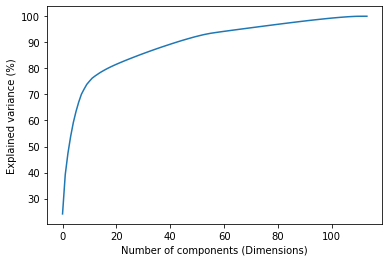

In [168]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train_df.values)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [169]:
# We are taking 60 components as we can see from above graph we can get above 90% convergence from 60 components
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train_df.values)
X_scaledtest = sc.fit_transform(X_test_df.values)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_scaled)
X_pca_test = pca.fit_transform(X_scaledtest)
# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
X_pca_test = pd.DataFrame(X_pca_test)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0 -4.558449  0.771980 -2.278215  3.171061 -1.588243 -0.923207  1.175453   
1  0.278124 -1.762752  0.554019 -0.355006  0.101879  0.943380 -1.193322   
2  1.562467 -2.866267 -2.341040  0.478808  2.075629 -2.297809  1.207907   
3 -0.754694  2.897505  2.166476 -0.737508 -1.330495 -2.235861 -2.018056   
4 -4.958645 -0.805977  2.026695  1.117163  0.379404 -1.834243 -0.603969   

         7         8         9   ...        50        51        52        53  \
0 -0.616445  0.662461  2.157365  ... -2.620886 -0.556160 -0.548770  0.495078   
1 -0.765273 -0.701667 -0.137367  ... -1.527886  0.320286  0.077653  0.921726   
2  0.617790 -1.050764  1.256988  ... -0.476622 -2.020399  0.040134  0.354809   
3 -1.612812  1.512074 -1.300132  ... -0.881236  0.456620 -0.134485  0.139678   
4 -1.045801  1.510305 -1.713873  ... -1.119594 -0.776635  0.067241  0.948532   

         54        55        56        57        58        59  
0 -1

In [171]:
# Make train and test sets
from sklearn.model_selection import train_test_split

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1200)

# Train the model
clf.fit(X_pca,Y_train_df.values.ravel())

LogisticRegression(max_iter=1200)

In [173]:
# Make predictions
y_pred_pca = clf.predict_proba(X_pca_test)
# using PCA it gives less accuracy score than Logistic regression

### Final 3 submissions are 
### 1) logistic regression without outlier  (Public score : 0.87053 & Private score : 0.87514)
### 2) SVMwithout outlier  (Public score : 0.87020 & Private score : 0.87475)
### 3) logistic regression with outlier  (Public score : 0.86766 & Private score : 0.87284)